In [86]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
#import all data and divide into variables

nanosurface_rough_data = pd.read_excel('2SurfaceNanoroughnessParameters.xlsx', header = [0,1], 
                                    index_col = 0, skip_footer = 39) #end of spreadsheet contains averages and SEMs, I want these separate
nanosurface_rough_mean = pd.read_excel('2SurfaceNanoroughnessParameters.xlsx', header = [0,1],  #the averages only
                                  index_col = 0, skiprows = np.arange(0,139), skip_footer = 26)
nanosurface_rough_SEM = pd.read_excel('2SurfaceNanoroughnessParameters.xlsx', header = [0,1], #standard error of mean
                                    index_col = 0, skiprows = np.arange(0,152), skip_footer = 13)

nanosurface_stiffness_data = pd.read_excel('3SurfaceNanostiffnessParameters.xlsx', header = [0,1],
                                         index_col = 0, skip_footer = 39)
nanosurface_stiffness_mean = pd.read_excel('3SurfaceNanostiffnessParameters.xlsx', header = [0,1],
                                        index_col = 0,  skiprows =np.arange(0,101), skip_footer = 26)
nanosurface_stiffness_SEM = pd.read_excel('3SurfaceNanostiffnessParameters.xlsx', header = [0,1],
                                        index_col = 0, skiprows = np.arange(0,114), skip_footer = 13)

forces_data = pd.read_excel('8StaticMechanicalParameters.xlsx', header = [0,1],
                           index_col = 0, skip_footer = 104, na_values = '-')
forces_mean = pd.read_excel('8StaticMechanicalParameters.xlsx', header = [0,1],
                           index_col = 0, skiprows = 144, skip_footer = 41)
forces_SEM = pd.read_excel('8StaticMechanicalParameters.xlsx', header = [0,1],
                         index_col = 0, skiprows = 162, skip_footer = 23)

forces_mean

,Max Ld,Max Pull,Snap In,Detach Sep,Youngs Mod,Zero Ind,Energy
,nN,nN,nN,nm,Pa,nm,J
Aglaoctenus lagotis,182.298600,103.81931,177.576400,125.032440,2.457493e+07,160.589750,2.075269e-14
Argiope argentata,176.016100,74.13699,168.610222,232.704740,1.832032e+07,214.228500,1.523221e-14
Argiope lobata,214.800400,83.54540,213.224900,115.700260,4.667087e+06,326.074400,9.640709e-15
Avicularia juruensis,201.253689,90.89827,133.346186,96.891226,4.647618e+08,77.184009,1.671695e-14
Avicularia sp,190.169333,36.51200,191.793714,193.827938,1.121315e+08,70.099325,2.093182e-14
Gasteracantha cancriformis,197.524600,102.05846,193.356800,118.959500,5.276046e+07,231.728790,1.922544e-14
Nephila clavipes,183.107600,72.46358,185.356500,164.881830,3.729398e+07,162.562070,2.057317e-14
Nephilengys cruentata,179.032900,93.21266,172.653000,205.185960,1.032405e+07,236.923400,1.811502e-14
Parawixia bistriata,180.926111,64.05165,189.662500,191.800360,8.302084e+07,112.041944,2.285687e-14


In [4]:
spiders = np.array(['Aglaoctenus lagotis', 'Argiope argentata', 'Argiope lobata', 'Avicularia juruensis', 'Avicularia (sp)',
                   'Gasteracantha cancriformis', 'Nephila clavipes', 'Nephilengys cruentata', 'Parawixia bistriata'])

In [ ]:
#make scatter plots of stuff


nanosurface_rough_meanT = nanosurface_rough_mean.transpose()
#nanosurface_rough_meanT.ix[0:4].plot(kind = 'bar', logy = False, 
                                     #legend = False, yerr = nanosurface_rough_SEM.transpose(), 
                                     #figsize = (8,5), 
                                    #title = 'Nanosurface roughness of various spider species').legend(bbox_to_anchor=(1.5, 1.0))
#plt.savefig('Nanosurface Roughness Bar Comparisons.png', bbox_inches = 'tight')

#nanosurface_rough_meanT.plot(x = np.arange(9), y = nanosurface_rough_mean.ix[:,0], kind = 'scatter')

In [ ]:
nanosurface_stiffness_meanT = nanosurface_stiffness_mean.transpose()
#nanosurface_stiffness_meanT.ix[0:4].plot(kind = 'bar', logy = False,
                                legend = False, yerr = nanosurface_stiffness_SEM.transpose(),
                                title = 'Nanosurface stiffness of various spider species').legend(bbox_to_anchor=(1.7, 1.0))
#plt.savefig('Nanosurface Stiffness Bar Comparisons.png', bbox_inches = 'tight')



C:\Users\Laura\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  if __name__ == '__main__':


[  9.97913388e-01   1.81719672e-03   2.60440374e-04   7.47771439e-06
   7.31913212e-07   4.56299962e-07   1.40836255e-07   7.36292400e-08
   7.03079039e-08   2.17393637e-08   2.14685253e-09]


<Container object of 11 artists>

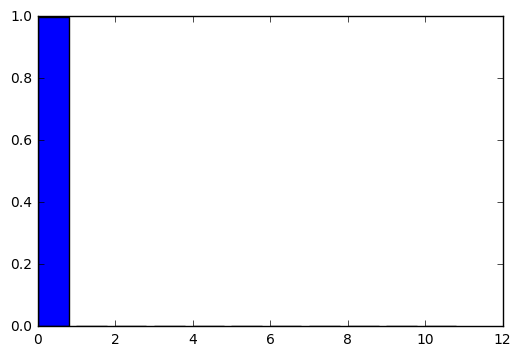

In [13]:
mod_nanosurface_rough_data = nanosurface_rough_data.drop(['Projected Area (10^-15)'], axis = 1)

nano_rough_PCA = PCA()
nano_rough_PCA.fit(mod_nanosurface_rough_data)
nano_rough_array = nano_rough_PCA.explained_variance_ratio_
nano_rough_PCA_trans = nano_rough_PCA.transform(mod_nanosurface_rough_data)

print (nano_rough_array)
plt.bar(np.arange(nano_rough_array.size), nano_rough_array)


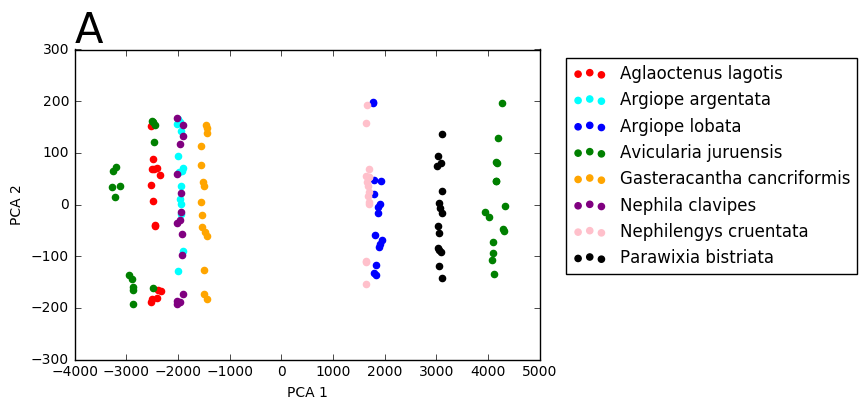

In [270]:
colors = np.array(['red', 'cyan', 'blue', 'green','yellow', 'orange','purple','pink','black'])
nano_rough_ind = mod_nanosurface_rough_data.index.format() #convert indexes into arrays because I gave up trying to figure out another method

new = True
oldc = -1

for n in range (nano_rough_PCA_trans.shape[0]): # go through each sample, find color, then plot
    new = False
    for z in range (colors.size): #go through list of spiders to find which is the correct one
        if spiders[z] in nano_rough_ind[n]:
            c = z
            if oldc < c: #checks to see if theres a new spider/color
                new = True
                oldc = c

                                          
    rough_plot = plt.scatter(x = nano_rough_PCA_trans[n,0], y = nano_rough_PCA_trans[n,1], color = colors[c], 
                             label =  spiders[c] if new else "")
plt.legend(bbox_to_anchor=(1.7, 1))
plt.title ("A", loc = 'left', fontsize = 30)
plt.xlabel ("PCA 1")
plt.ylabel ("PCA 2")

plt.savefig('Nanosurface Roughness PCA.png', bbox_inches = 'tight')

[  7.94672148e-01   1.44998619e-01   4.79592518e-02   8.66286580e-03
   3.37286672e-03   3.09086729e-04   2.46907265e-05   4.71210611e-07]


<Container object of 8 artists>

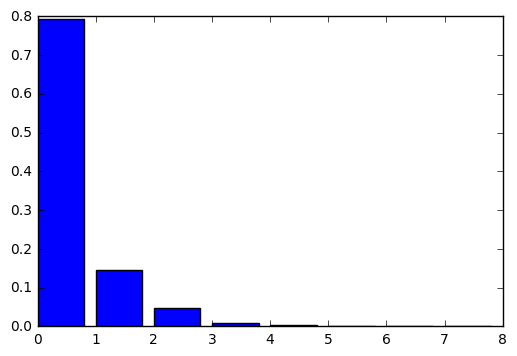

In [7]:
nano_stiffness_PCA = PCA()
nano_stiffness_PCA.fit(nanosurface_stiffness_data)
nano_stiffness_array = nano_stiffness_PCA.explained_variance_ratio_
nano_stiffness_PCA_trans = nano_stiffness_PCA.transform(nanosurface_stiffness_data)

print (nano_stiffness_array)
plt.bar(np.arange(nano_stiffness_array.size), nano_stiffness_array)

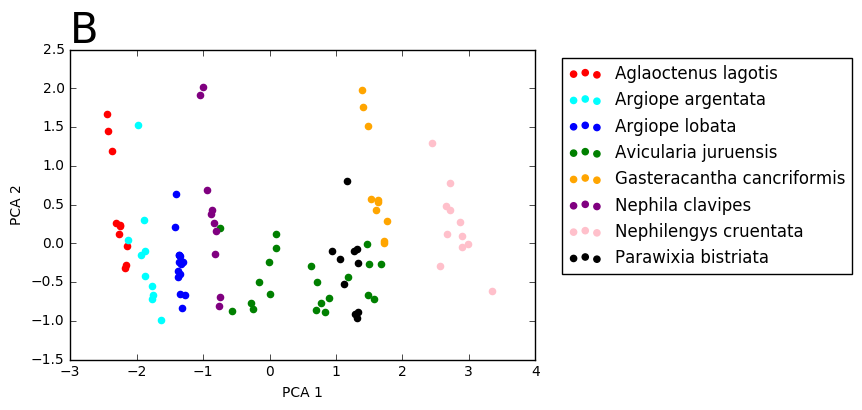

In [271]:
nano_stiffness_ind = nanosurface_stiffness_data.index.format() #convert indexes into arrays because I gave up trying to figure out another method

new = True
oldc = -1

for n in range (nano_stiffness_PCA_trans.shape[0]): # go through each sample, find color, then plot
    new = False
    for z in range (colors.size): #go through list of spiders to find which is the correct one
        if spiders[z] in nano_stiffness_ind[n]:
            c = z
            if oldc < c: #checks to see if theres a new spider/color
                new = True
                oldc = c

                                          
    stiff_plot = plt.scatter(x = nano_stiffness_PCA_trans[n,0], y = nano_stiffness_PCA_trans[n,1], color = colors[c], 
                             label =  spiders[c] if new else "")
plt.legend(bbox_to_anchor=(1.7, 1))
plt.title ("B", loc = 'left', fontsize = 30)
plt.xlabel ("PCA 1")
plt.ylabel ("PCA 2")

plt.savefig('Nanosurface Stiffness PCA.png', bbox_inches = 'tight')

[  1.00000000e+00   2.14396920e-13   1.15092117e-13   1.25965130e-14
   5.59703410e-15   3.71796451e-15   2.21672506e-46]


<Container object of 7 artists>

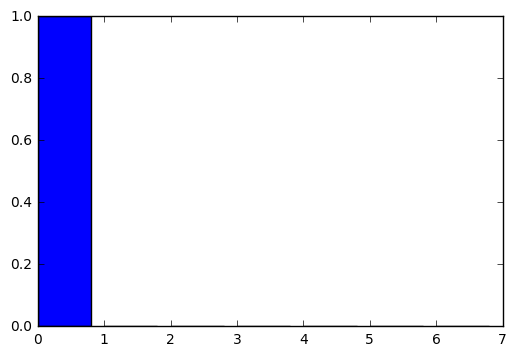

In [229]:
forces_noNa = forces_data.dropna()
forces_PCA = PCA()
forces_PCA.fit(forces_noNa)
forces_array = forces_PCA.explained_variance_ratio_
forces_PCA_trans = forces_PCA.transform(forces_noNa)


print (forces_array)
plt.bar(np.arange(forces_array.size), forces_array)

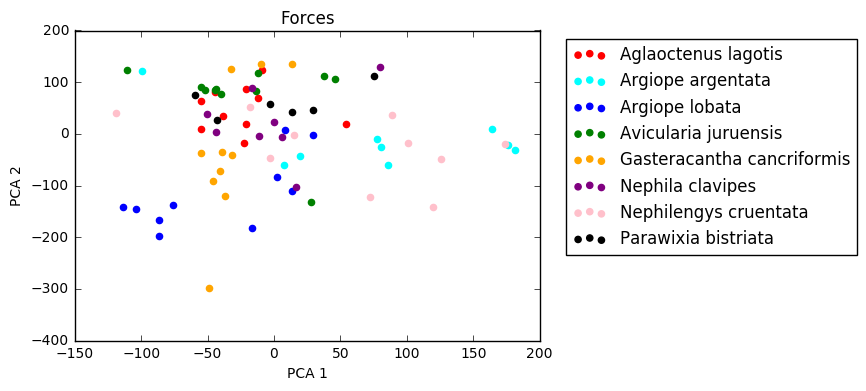

In [230]:
forces_ind = forces_noNa.index.format() #convert indexes into arrays because I gave up trying to figure out another method

new = True
oldc = -1

for n in range (forces_PCA_trans.shape[0]): # go through each sample, find color, then plot
    new = False
    for z in range (colors.size): #go through list of spiders to find which is the correct one
        if spiders[z] in forces_ind[n]:
            c = z
            if oldc < c: #checks to see if theres a new spider/color
                new = True
                oldc = c

                                          
    forces_plot = plt.scatter(x = forces_PCA_trans[n,2], y = forces_PCA_trans[n,1], color = colors[c], 
                             label =  spiders[c] if new else "")
plt.legend(bbox_to_anchor=(1.7, 1))
plt.title ("Forces")
plt.xlabel ("PCA 1")
plt.ylabel ("PCA 2")

C:\Users\Laura\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  if __name__ == '__main__':


0.269890777768 0.482472980095
0.253363575975 0.510671453496
0.281761118504 0.462631737268
0.270059661955 0.482188238306
0.688195178851 0.0404193971467
0.672714006941 0.0470843396962
0.0343152831923 0.930162040803
0.0546294152441 0.888986273612
0.840923440889 0.00450825622509
0.798681735443 0.0098382858521
0.0590003957761 0.880153503991


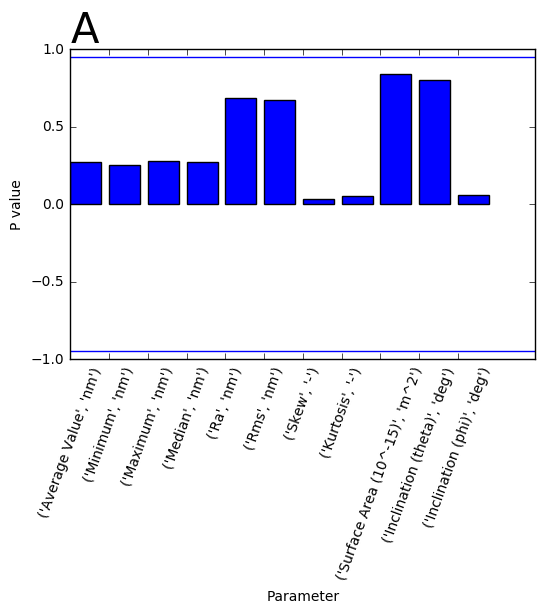

In [269]:
no_col_area = nanosurface_rough_mean.drop(['Projected Area (10^-15)'], axis = 1)
nano_rough_val = no_col_area.values
forces_val = forces_mean.values
for x in range (11): 
    val,p = pearsonr(nano_rough_val[:,x],forces_val[:,4])
    plt.bar(x, val)
    print (val, p)
rough_colnames = list(no_col_area)
plt.xticks(np.arange(11), rough_colnames, rotation = 70)
plt.axhline(y = .95)
plt.axhline(y = -.95)
plt.ylabel('P value')
plt.xlabel ('Parameter')
plt.title ("A", loc = 'left', fontsize = 30)
plt.savefig('Nanosurface Roughness Young.png', bbox_inches = 'tight')

-0.08579532476 0.826287762426
-0.0873281928798 0.82322319841
-0.0858442139354 0.826189989922
-0.0856553592412 0.826567688144
0.0274005932938 0.944214882296
0.0374758183156 0.923744184957
0.040273768695 0.918065767151
0.313684884091 0.411073426468
0.0241591010643 0.950807415351
0.0225952551879 0.953988903579
-0.266028987898 0.489003061739


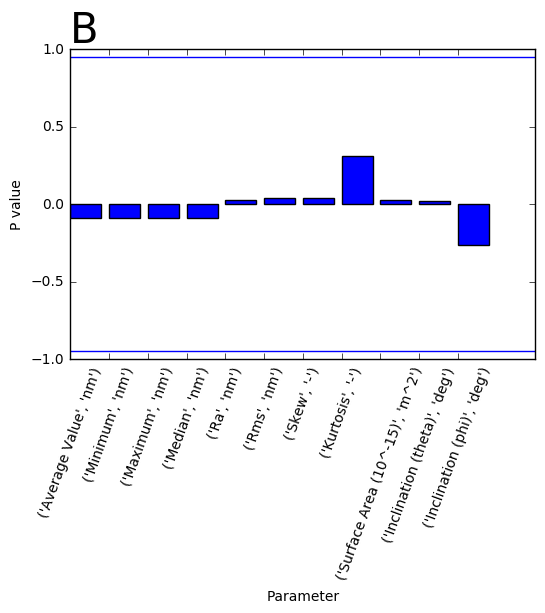

In [268]:
for x in range (11): 
    val,p = pearsonr(nano_rough_val[:,x],forces_val[:,-1])
    plt.bar(x, val)
    print (val, p)
rough_colnames = list(no_col_area)
plt.xticks(np.arange(11), rough_colnames, rotation = 70)
plt.axhline(y = .95)
plt.axhline(y = -.95)
plt.ylabel('P value')
plt.xlabel ('Parameter')

plt.title ("B", loc = 'left', fontsize = 30)
plt.savefig('Nanosurface Roughness Pearson Dissociation Energy.png', bbox_inches = 'tight')

0.655487236672 0.0552835415465
0.665015095957 0.0506450789842
0.650566335805 0.0577811192997
0.655181175846 0.0554368434509
-0.499876988429 0.170592761515
-0.516512413244 0.154534739922
0.1234777354 0.751627393866
-0.942260001323 0.000143903246466
-0.36352523726 0.336215234211
-0.441453110347 0.234224438508
0.365632201526 0.333210279747


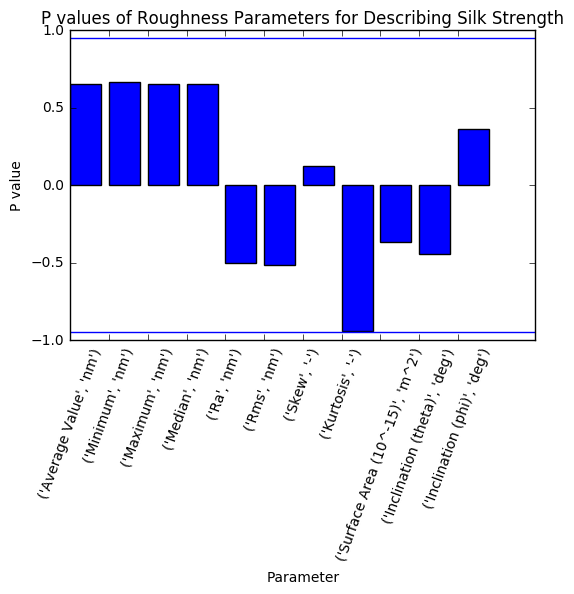

In [67]:
# no use
for x in range (11): 
    val,p = pearsonr(nano_rough_val[:,x],forces_val[:,1])
    plt.bar(x, val)
    print (val, p)
rough_colnames = list(no_col_area)
plt.xticks(np.arange(11), rough_colnames, rotation = 70)
plt.axhline(y = .95)
plt.axhline(y = -.95)
plt.ylabel('P value')
plt.xlabel ('Parameter')
plt.title ("P values of Roughness Parameters for Describing Silk Strength")

0.089318173002 0.819247847539
-0.0524196454454 0.893455802336
0.10044790331 0.797081975623
0.0769316535483 0.844047037642
0.551409620823 0.123813235009
0.545739264261 0.128533183501
0.610068577509 0.0810595920324
-0.33224704504 0.382363378141


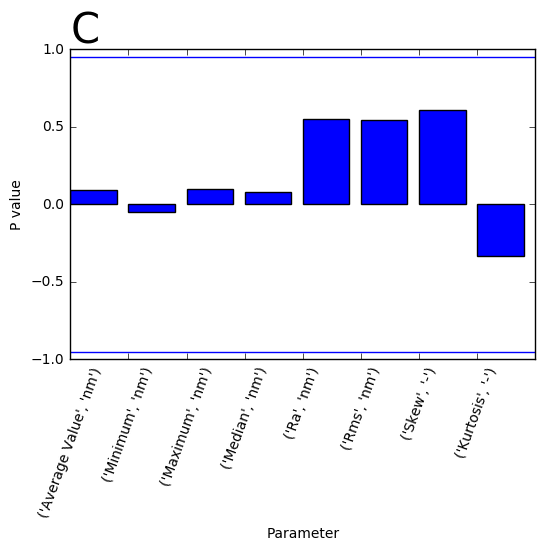

In [267]:
nano_stiff_val = nanosurface_stiffness_mean.values
for x in range (8): 
    val,p = pearsonr(nano_stiff_val[:,x],forces_val[:,4])
    plt.bar(x, val)
    print (val, p)
rough_colnames = list(no_col_area)
plt.xticks(np.arange(8), rough_colnames, rotation = 70)
plt.axhline(y = .95)
plt.axhline(y = -.95)
plt.ylabel('P value')
plt.xlabel ('Parameter')
plt.title ("C", loc = 'left', fontsize = 30)
plt.savefig('Nanosurface Stiffness Young.png', bbox_inches = 'tight')

0.351211396903 0.354041665253
0.357524730859 0.344845838316
0.357477401279 0.344914338892
0.351458582461 0.353679412308
0.0674159501424 0.863180450731
0.0662601667596 0.865508784429
-0.11600946448 0.766301941406
0.113313207472 0.771615942853


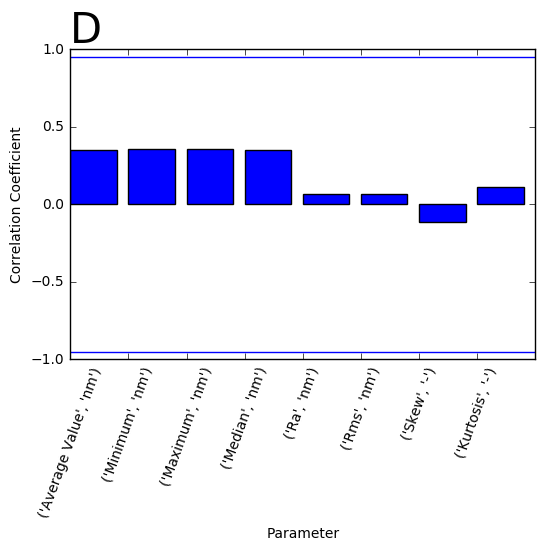

In [266]:
for x in range (8): 
    val,p = pearsonr(nano_stiff_val[:,x],forces_val[:,-1])
    plt.bar(x, val)
    print (val, p)
rough_colnames = list(no_col_area)
plt.xticks(np.arange(8), rough_colnames, rotation = 70)
plt.axhline(y = .95)
plt.axhline(y = -.95)
plt.ylabel('Correlation Coefficient')
plt.xlabel ('Parameter')
plt.title ("D", loc = 'left', fontsize = 30)
plt.savefig('Nanosurface Stiffness Energy.png', bbox_inches = 'tight')


-0.104610210524 0.78882371089
-0.138833405477 0.721674471215
-0.143949299756 0.711765604561
-0.099006298735 0.799946310756
-0.443558998033 0.231736385253
-0.437992796826 0.23834398655
-0.603572074362 0.0852582472874
0.692152025967 0.0388198082594


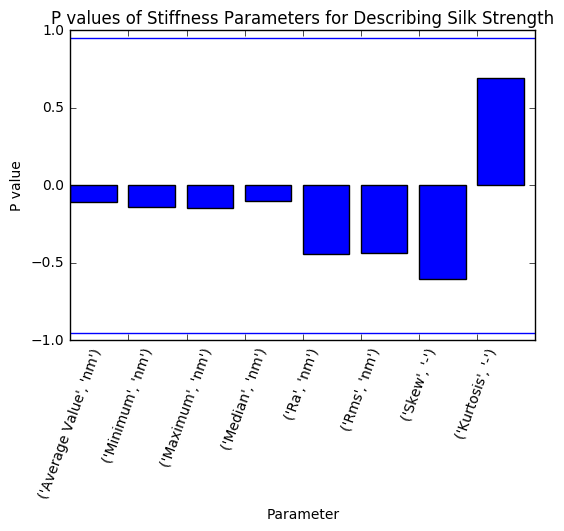

In [69]:
for x in range (8): 
    val,p = pearsonr(nano_stiff_val[:,x],forces_val[:,1])
    plt.bar(x, val)
    print (val, p)
rough_colnames = list(no_col_area)
plt.xticks(np.arange(8), rough_colnames, rotation = 70)
plt.axhline(y = .95)
plt.axhline(y = -.95)
plt.ylabel('P value')
plt.xlabel ('Parameter')
plt.title ("P values of Stiffness Parameters for Describing Silk Strength")

In [30]:
print(forces_SEM/forces_mean)

                              Max Ld  Max Pull   Snap In Detach Sep  \
                                  nN        nN        nN         nm   
Aglaoctenus lagotis         0.018284  0.033682  0.022546   0.074133   
Argiope argentata           0.024268  0.057820  0.029524   0.124995   
Argiope lobata              0.007517  0.036485  0.009998   0.147679   
Avicularia juruensis        0.046159  0.093128  0.039453   0.055785   
Avicularia sp               0.030390  0.126007  0.014773   0.157005   
Gasteracantha cancriformis  0.046714  0.037286  0.053948   0.026973   
Nephila clavipes            0.035212  0.079344  0.032800   0.101062   
Nephilengys cruentata       0.020989  0.094218  0.020307   0.135092   
Parawixia bistriata         0.050130  0.104260  0.040859   0.110469   

                           Youngs Mod  Zero Ind    Energy  
                                   Pa        nm         J  
Aglaoctenus lagotis          0.218345  0.088302  0.030168  
Argiope argentata            0.466692 

In [ ]:
#take raw numbers and remove 10%
#PCA it
#lin regression model

#roughness/ stiffness for Youngs and Energy


In [44]:
#make my Y values
#all "Y" will be the average force values per spider
#the Yarray

nano_rough_ind_array = np.asarray(nano_rough_ind)
nano_stiffness_ind_array = np.asarray(nano_stiffness_ind)

nano_rough_Y_Youngs = np.zeros(nano_rough_ind_array.size)
nano_rough_Y_Energy = np.zeros(nano_rough_ind_array.size)
nano_stiffness_Y_Youngs = np.zeros(nano_stiffness_ind_array.size)
nano_stiffness_Y_Energy = np.zeros(nano_stiffness_ind_array.size)

for n in range (nano_rough_ind_array.size): # go through each sample, find color, then plot
    for z in range (spiders.size): #go through list of spiders to find which is the correct one
        if spiders[z] in nano_rough_ind[n]:
            nano_rough_Y_Youngs[n] = forces_val[z,4]

for n in range (nano_rough_ind_array.size): # go through each sample, find color, then plot
    for z in range (spiders.size): #go through list of spiders to find which is the correct one
        if spiders[z] in nano_rough_ind[n]:
            nano_rough_Y_Energy[n] = forces_val[z,-1]            
            
for n in range (nano_stiffness_ind_array.size): # go through each sample, find color, then plot
    for z in range (spiders.size): #go through list of spiders to find which is the correct one
        if spiders[z] in nano_stiffness_ind[n]:
            nano_stiffness_Y_Youngs[n] = forces_val[z,4]            

for n in range (nano_stiffness_ind_array.size): # go through each sample, find color, then plot
    for z in range (spiders.size): #go through list of spiders to find which is the correct one
        if spiders[z] in nano_stiffness_ind[n]:
            nano_stiffness_Y_Energy[n] = forces_val[z,-1]

In [18]:
def test_train_id(N, test_frac): #take 1D array and fraction
    testnum = int(np.round(N.size*test_frac)) #number of test objects (use int to get rid of that annoying warning message)
    #make 2 empty arrays
    test = np.zeros(testnum)
    train = np.zeros(N.size-test.size)
    
    test_index = np.random.choice(N.size,testnum, replace = False) #randomly choose index
    #make boolean index to see if each item in array of numbers 0-N.size is in test_index
    boolindex = np.in1d(np.arange(N.size),test_index) #true means index is in test
    
    testcounter = 0
    traincounter = 0
    
    for x in range (N.size): #shuffles indexes into either test or train array
        if boolindex[x] == True:
            test[testcounter] = x
            testcounter += 1
        else:
            train[traincounter] = x
            traincounter += 1
   
    return train , test #return indexes of train and test samples
    

In [222]:

def model_making(nano_rough_ind_array, mod_nanosurface_rough_data, Yarray):    
    fraction = 0.1
    RY_t_train, RY_t_test = test_train_id(nano_rough_ind_array, fraction)

    RY_train = mod_nanosurface_rough_data.iloc[int(RY_t_train[0])]
    RY_test = mod_nanosurface_rough_data.iloc[int(RY_t_test[0])]
    RY_train_y = Yarray[RY_t_train[0]]
    RY_test_y = Yarray[int(RY_t_test[0])]

    for x in range (1,RY_t_train.size):
        RY_train = np.vstack((RY_train,mod_nanosurface_rough_data.iloc[int(RY_t_train[x])]))
        RY_train_y = np.append(RY_train_y,Yarray[int(RY_t_train[x])])

    for x in range (1,RY_t_test.size):
        RY_test = np.vstack((RY_test,mod_nanosurface_rough_data.iloc[int(RY_t_test[x])]))
        RY_test_y = np.append(RY_test_y,Yarray[int(RY_t_test[x])])

    
    #PCA me trainin data
    nano_rough_PCA = PCA()
    rough_using = nano_rough_PCA.fit_transform(RY_train)[:,:5]#taking the first 5 PCAs

    regr = linear_model.LinearRegression()
    regr.fit(rough_using,RY_train_y)

    RY_test_x = nano_rough_PCA.transform(RY_test)[:,:5]
    predictions = regr.predict(RY_test_x)
    avg_fail = abs(np.mean(predictions - RY_test_y))
    score = regr.score(RY_test_x,RY_test_y)

    return avg_fail, score

In [223]:
iterations = 200
RY_fail_tot = 0
RY_score_tot = 0
RE_fail_tot = 0
RE_score_tot = 0
SY_fail_tot = 0
SY_score_tot = 0
SE_fail_tot = 0
SE_score_tot = 0
for z in range (iterations):    
    RY_fail, RY_score = model_making(nano_rough_ind_array,mod_nanosurface_rough_data,nano_rough_Y_Youngs)
    RY_fail_tot += RY_fail
    RY_score_tot +=RY_score
    
    RE_fail, RE_score = model_making(nano_rough_ind_array,mod_nanosurface_rough_data,nano_rough_Y_Energy)
    RE_fail_tot +=RE_fail
    RE_score_tot +=RE_score

    SY_fail, SY_score = model_making(nano_stiffness_ind_array, nanosurface_stiffness_data, nano_stiffness_Y_Youngs)
    SY_fail_tot +=SY_fail
    SY_score_tot +=SY_score

    SE_fail, SE_score = model_making(nano_stiffness_ind_array, nanosurface_stiffness_data, nano_stiffness_Y_Energy)
    SE_fail_tot +=SE_fail
    SE_score_tot+=SE_score
    
    if(z>150):
        print (RY_fail)

C:\Users\Laura\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


40046890.1724
16578955.6953
19060523.7902
10778847.6762
10082226.5587
8514777.69214
2906487.02958
10214274.8031
8749805.47203
50992177.391
3654596.48775
2355361.84976
24054183.3684
15291750.6443
2493711.59242
5504570.06494
5687148.44984
10133657.0625
735124.823528
19973561.9401
15037962.1898
14790278.8946
3468923.89521
88900665.853
5032314.88067
3563674.70592
949746.790945
35118249.5567
19263781.2195
2701390.47691
1702732.47963
13792709.5273
8646209.35426
9206757.32787
14846106.9001
30765416.4204
21084773.0155
57566802.218
20877144.0517
58186873.9677
26198878.3671
60285101.8209
4897335.40988
4476886.72496
30045743.5077
22614698.7325
31748935.0773
26737960.9992
4146896.76001


In [235]:
#cross validated accuracies

Youngs_avg = np.mean(forces_val[:,4])
Energy_avg = np.mean(forces_val[:,-1])

RY_acc_fail = RY_fail_tot/iterations
RY_acc_score = RY_score_tot/iterations

RE_acc_fail = RE_fail_tot/iterations
RE_acc_score = RE_score_tot/iterations

SY_acc_fail = SY_fail_tot/iterations
SY_acc_score = SY_score_tot/iterations

SE_acc_fail = SE_fail_tot/iterations
SE_acc_score = SE_score_tot/iterations

fails = np.array([RY_acc_fail/Youngs_avg, RE_acc_fail/Energy_avg, SY_acc_fail/Youngs_avg, SE_acc_fail/Energy_avg])
scores = np.array([RY_acc_score, RE_acc_score, SY_acc_score, SE_acc_score])
print (fails)

[ 0.19611418  0.05147046  0.33792659  0.0938258 ]


In [238]:
labels = np.array(["Youngs by Roughness", "Energy by Roughness", "Youngs by Stiffness", "Energy by Stiffness"])

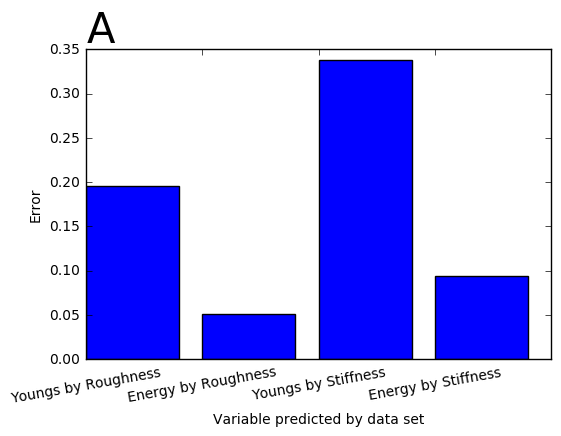

In [272]:
fig = plt.bar( np.arange(4), fails)
plt.xticks(np.arange(4), labels, rotation=10)
plt.xlabel("Variable predicted by data set")
plt.ylabel("Error")

plt.title ("A", loc = 'left', fontsize = 30)
plt.savefig('Errors.png', bbox_inches = 'tight')

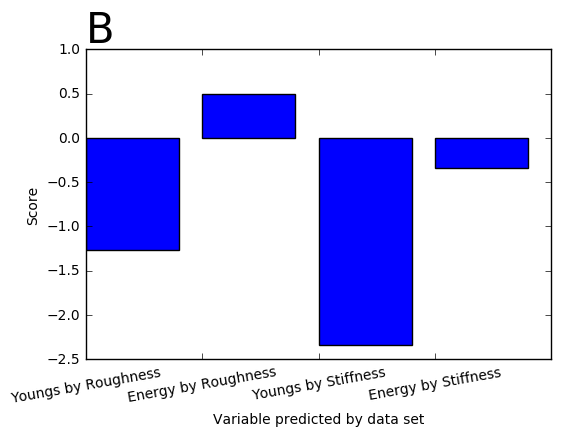

In [275]:
fig = plt.bar( np.arange(4), scores)
plt.xticks(np.arange(4), labels, rotation=10)
plt.xlabel("Variable predicted by data set")
plt.ylabel("Score")

plt.title ("B", loc = 'left', fontsize = 30)
plt.ylim([-2.5, 1.0])
plt.savefig('Scores.png', bbox_inches = 'tight')

In [254]:
forces_mean

,Max Ld,Max Pull,Snap In,Detach Sep,Youngs Mod,Zero Ind,Energy
,nN,nN,nN,nm,Pa,nm,J
Aglaoctenus lagotis,182.298600,103.81931,177.576400,125.032440,2.457493e+07,160.589750,2.075269e-14
Argiope argentata,176.016100,74.13699,168.610222,232.704740,1.832032e+07,214.228500,1.523221e-14
Argiope lobata,214.800400,83.54540,213.224900,115.700260,4.667087e+06,326.074400,9.640709e-15
Avicularia juruensis,201.253689,90.89827,133.346186,96.891226,4.647618e+08,77.184009,1.671695e-14
Avicularia sp,190.169333,36.51200,191.793714,193.827938,1.121315e+08,70.099325,2.093182e-14
Gasteracantha cancriformis,197.524600,102.05846,193.356800,118.959500,5.276046e+07,231.728790,1.922544e-14
Nephila clavipes,183.107600,72.46358,185.356500,164.881830,3.729398e+07,162.562070,2.057317e-14
Nephilengys cruentata,179.032900,93.21266,172.653000,205.185960,1.032405e+07,236.923400,1.811502e-14
Parawixia bistriata,180.926111,64.05165,189.662500,191.800360,8.302084e+07,112.041944,2.285687e-14
